![Airline_Project_Travel_Domain_EasemyTrip_Dataset_Banner](https://images.emtcontent.com/emt-mate/content/img/IndiGo-Airline-10-dec-25-b2b-desk.webp)

###### ************************************************************************************************************************************************************
# Airline Project:
****

### INTRODUCTION
- This project focuses on analyzing a real-world flight booking dataset sourced from the **EaseMyTrip** platform—an online travel portal used by customers to book flight tickets. 
- **The primary goal is to extract meaningful insights through statistical hypothesis testing and to predict flight fares using Linear Regression and other Regression Model, which is popular machine learning algorithm for continuous target prediction**.
- By exploring features such as **destination, route, meal options, and more, the project aims to uncover patterns and trends that can enhance the travel experience for potential passengers.
****
### Context
- Accurately predicting **flight fares is a complex challenge due to the dynamic nature of pricing strategies influenced by multiple factors**.
****
### Content Highlights
Beyond just rows and columns, the dataset includes valuable attributes like:
- 1.   Source and Destination
- 2.   Route details
- 3.   Total stops
- 4.   Meal inclusion
- 5.   Airline carriers
****
### Next Steps & Recommendations
	•	Experiment with different machine learning algorithms to improve prediction accuracy.
	•	Develop an end-to-end ML project for hands-on learning and practical experience.
###### ************************************************************************************************************************************************************


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
sns.set()
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_excel('/Users/abhisheksenapati/Desktop/Machine Learning & Stats/ML_final_project/Travel/Data & Data_Dictionary & releted/airline_dataset.xlsx')

In [3]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
dataset.shape

(10683, 11)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# EDA:
###### (Automated detailed EDA --> ydata_profiling)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████| 11/11 [00:00<00:00, 21.63it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

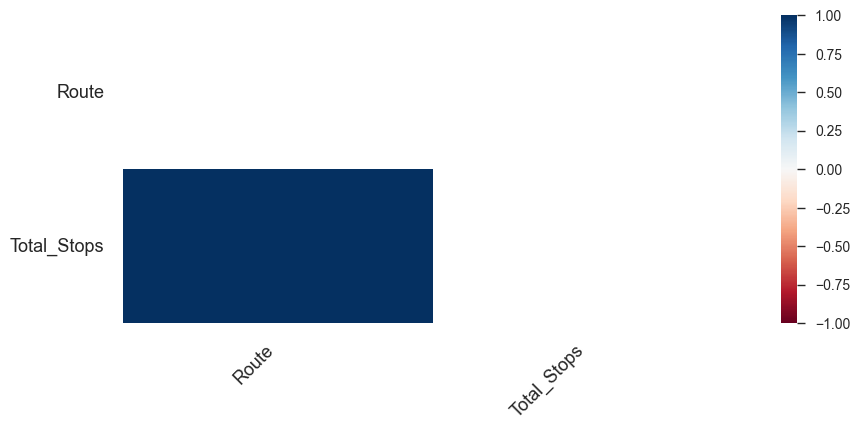

In [6]:
from ydata_profiling import ProfileReport

profile = ProfileReport(dataset, title="Airline_EasemyTrip EDA Report", explorative=True)

profile.to_notebook_iframe()
profile.to_file("EDA_report_Airline_EasemyTrip_Dataset.html")

In [7]:
import dtale
dtale.show(dataset)

In [8]:
(((dataset.isnull().sum())/len(dataset))*100).round(2)

Airline            0.00
Date_of_Journey    0.00
Source             0.00
Destination        0.00
Route              0.01
Dep_Time           0.00
Arrival_Time       0.00
Duration           0.00
Total_Stops        0.01
Additional_Info    0.00
Price              0.00
dtype: float64

In [9]:
dataset.dropna(inplace=True)

In [10]:
(((dataset.isnull().sum())/len(dataset))*100).round(2)

Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
Price              0.0
dtype: float64

# Pre Processing:

In [11]:
dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
# extracting info from Date_of_Journey

dataset['Journey_Day']=pd.to_datetime(dataset.Date_of_Journey,format="%d/%m/%Y").dt.day
dataset['Journey_Month']=pd.to_datetime(dataset.Date_of_Journey,format="%d/%m/%Y").dt.month
dataset['Journey_Year']=pd.to_datetime(dataset.Date_of_Journey,format="%d/%m/%Y").dt.year

In [13]:
dataset.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019


In [14]:
dataset['Journey_Year'].value_counts()

Journey_Year
2019    10682
Name: count, dtype: int64

In [15]:
dataset['Journey_Month'].value_counts()

Journey_Month
5    3465
6    3414
3    2724
4    1079
Name: count, dtype: int64

In [16]:
# so now will drop the original col Date_of_Journey and its only for 2019 data so will drop year also

dataset.drop(['Date_of_Journey','Journey_Year'],axis=1,inplace=True)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Journey_Day      10682 non-null  int32 
 11  Journey_Month    10682 non-null  int32 
dtypes: int32(2), int64(1), object(9)
memory usage: 1001.4+ KB


In [18]:
# Dep_Time --> converting appropriate dtypes and extracting info from Dep_Time


dataset['Dep_hour']=pd.to_datetime(dataset['Dep_Time']).dt.hour
dataset['Dep_min']=pd.to_datetime(dataset['Dep_Time']).dt.minute

In [19]:
dataset.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [20]:
# so now will drop the original col Dep_Time 

dataset.drop(['Dep_Time'],axis=1,inplace=True)

In [21]:
# Arrival_Time --> converting appropriate dtypes and extracting info from Arrival_Time


dataset['Arrival_Time_hour']=pd.to_datetime(dataset['Arrival_Time']).dt.hour
dataset['Arrival_Time_min']=pd.to_datetime(dataset['Arrival_Time']).dt.minute

In [22]:
# so now will drop the original col Arrival_Time 

dataset.drop(['Arrival_Time'],axis=1,inplace=True)

In [23]:
dataset.tail(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_Time_hour,Arrival_Time_min
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,8h 20m,2 stops,No info,11753,9,5,10,55,19,15


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Route              10682 non-null  object
 4   Duration           10682 non-null  object
 5   Total_Stops        10682 non-null  object
 6   Additional_Info    10682 non-null  object
 7   Price              10682 non-null  int64 
 8   Journey_Day        10682 non-null  int32 
 9   Journey_Month      10682 non-null  int32 
 10  Dep_hour           10682 non-null  int32 
 11  Dep_min            10682 non-null  int32 
 12  Arrival_Time_hour  10682 non-null  int32 
 13  Arrival_Time_min   10682 non-null  int32 
dtypes: int32(6), int64(1), object(7)
memory usage: 1001.4+ KB


In [25]:
# Duration --> converting appropriate dtypes and extracting info from Duration

duration = list(dataset['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
    
dataset['duration_hour'] = duration_hours
dataset['duration_mins'] = duration_mins

In [26]:
dataset.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [27]:
# so now will drop the original col duration 

dataset.drop(['Duration'],axis=1,inplace=True)

In [28]:
dataset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Route              10682 non-null  object
 4   Total_Stops        10682 non-null  object
 5   Additional_Info    10682 non-null  object
 6   Price              10682 non-null  int64 
 7   Journey_Day        10682 non-null  int32 
 8   Journey_Month      10682 non-null  int32 
 9   Dep_hour           10682 non-null  int32 
 10  Dep_min            10682 non-null  int32 
 11  Arrival_Time_hour  10682 non-null  int32 
 12  Arrival_Time_min   10682 non-null  int32 
 13  duration_hour      10682 non-null  int64 
 14  duration_mins      10682 non-null  int64 
dtypes: int32(6), int64(3), object(6)
memory usage: 1.1+ MB


In [30]:
print(dataset['Destination'].value_counts())
print('*******************************')
print(dataset['Airline'].value_counts())
print('*******************************')
print(dataset['Source'].value_counts())
print('*******************************')
print(dataset['Route'].value_counts())
print('*******************************')
print(dataset['Total_Stops'].value_counts())

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64
*******************************
Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
*******************************
Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64
*******************************
Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → 

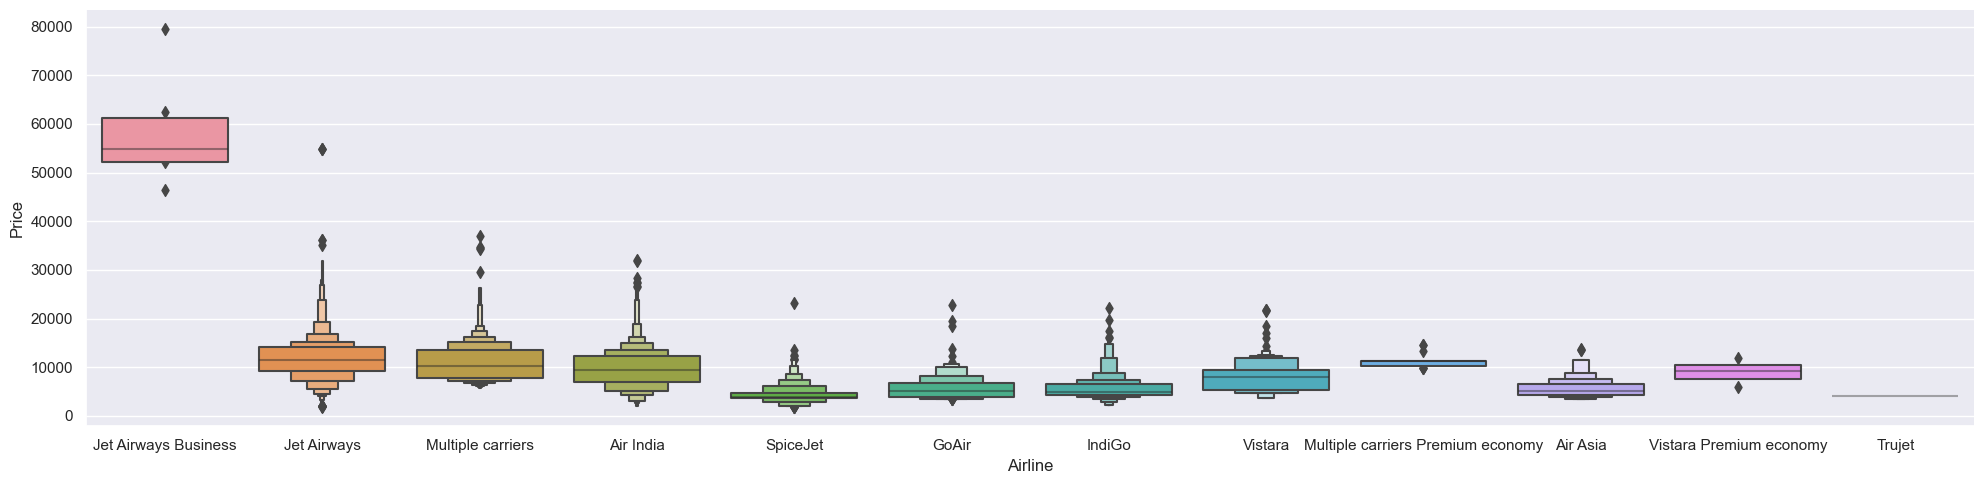

In [31]:
# how price impacting by airline

sns.catplot(y='Price',
            x='Airline',
            data=dataset.sort_values('Price',ascending=False),
            kind='boxen',
            height=5,
            aspect=4)
plt.show()

In [32]:
Airline1=dataset[['Airline']]
Airline1=pd.get_dummies(Airline1,drop_first=True,dtype='int64')
Airline1.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


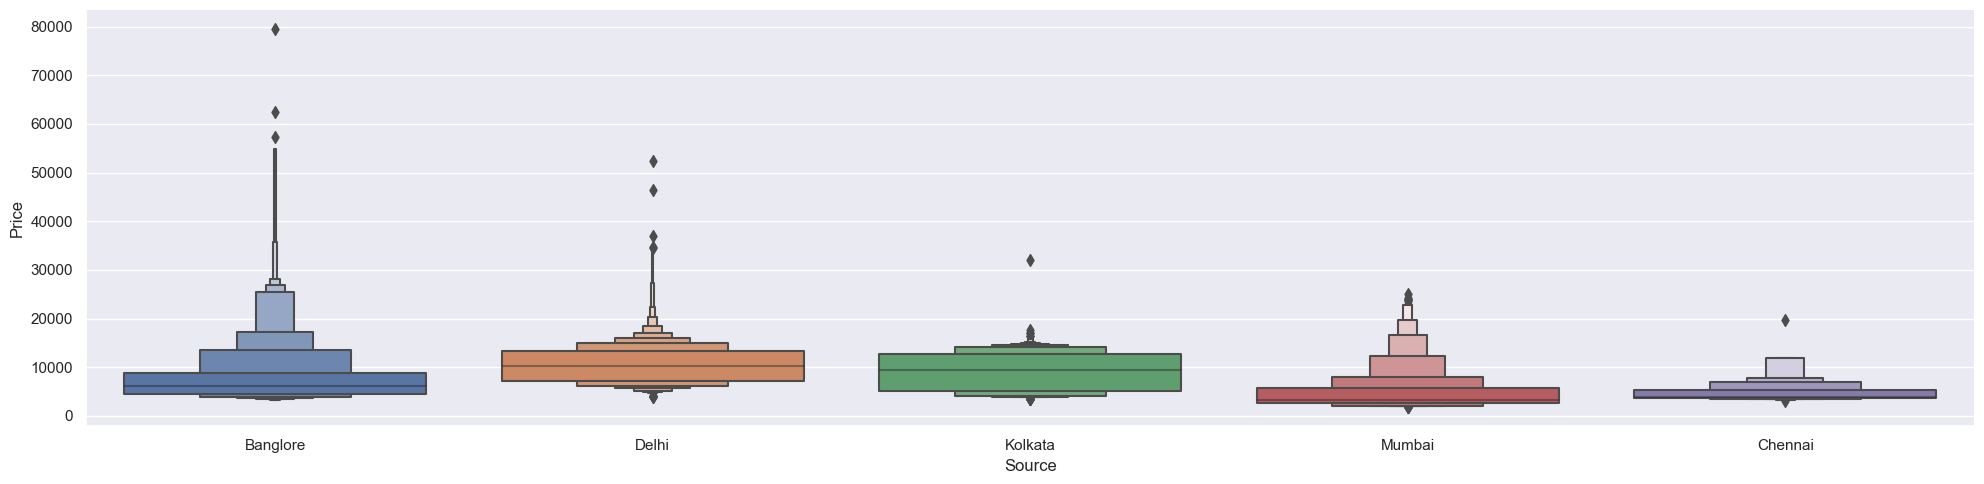

In [33]:
# how price impacting by source

sns.catplot(y='Price',
            x='Source',
            data=dataset.sort_values('Price',ascending=False),
            kind='boxen',
            height=5,
            aspect=4)
plt.show()

In [34]:
Source1=dataset[['Source']]
Source1=pd.get_dummies(Source1,drop_first=True,dtype='int64')
Source1.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


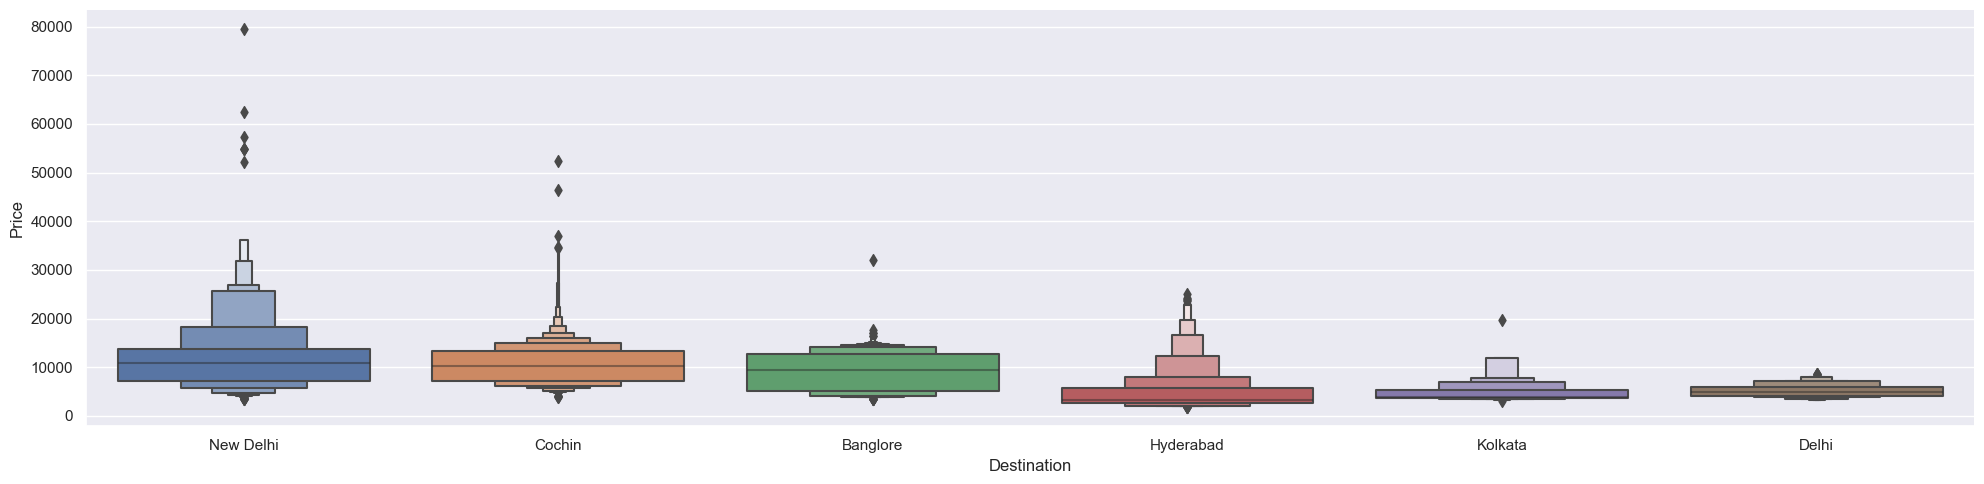

In [35]:
# how price impacting by Destination

sns.catplot(y='Price',
            x='Destination',
            data=dataset.sort_values('Price',ascending=False),
            kind='boxen',
            height=5,
            aspect=4)
plt.show()

In [36]:
#rename Delhi to New Delhi in your Destination column as delhi/new delhi have only 1 airport there is no separate 
# airport for Delhi and New Delhi:


dataset['Destination']=np.where(dataset['Destination']=='Delhi','New Delhi',dataset['Destination'])

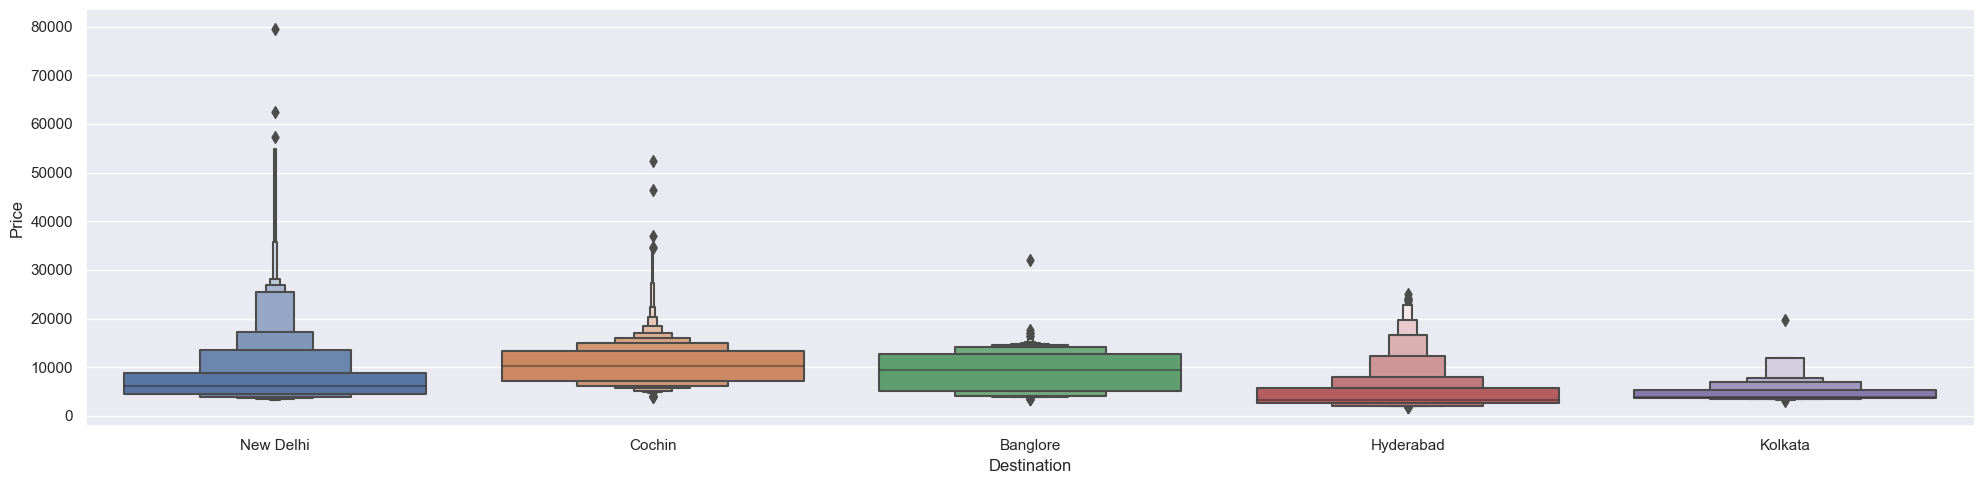

In [37]:
sns.catplot(y='Price',
            x='Destination',
            data=dataset.sort_values('Price',ascending=False),
            kind='boxen',
            height=5,
            aspect=4)
plt.show()

In [38]:
Destination1=dataset[['Destination']]
Destination1=pd.get_dummies(Destination1,drop_first=True,dtype='int64')
Destination1.head()

,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,1
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,0,1


In [39]:
# already we have taken source and destination so not require the route then will drop it

dataset.drop(['Route'],axis=1,inplace=True)

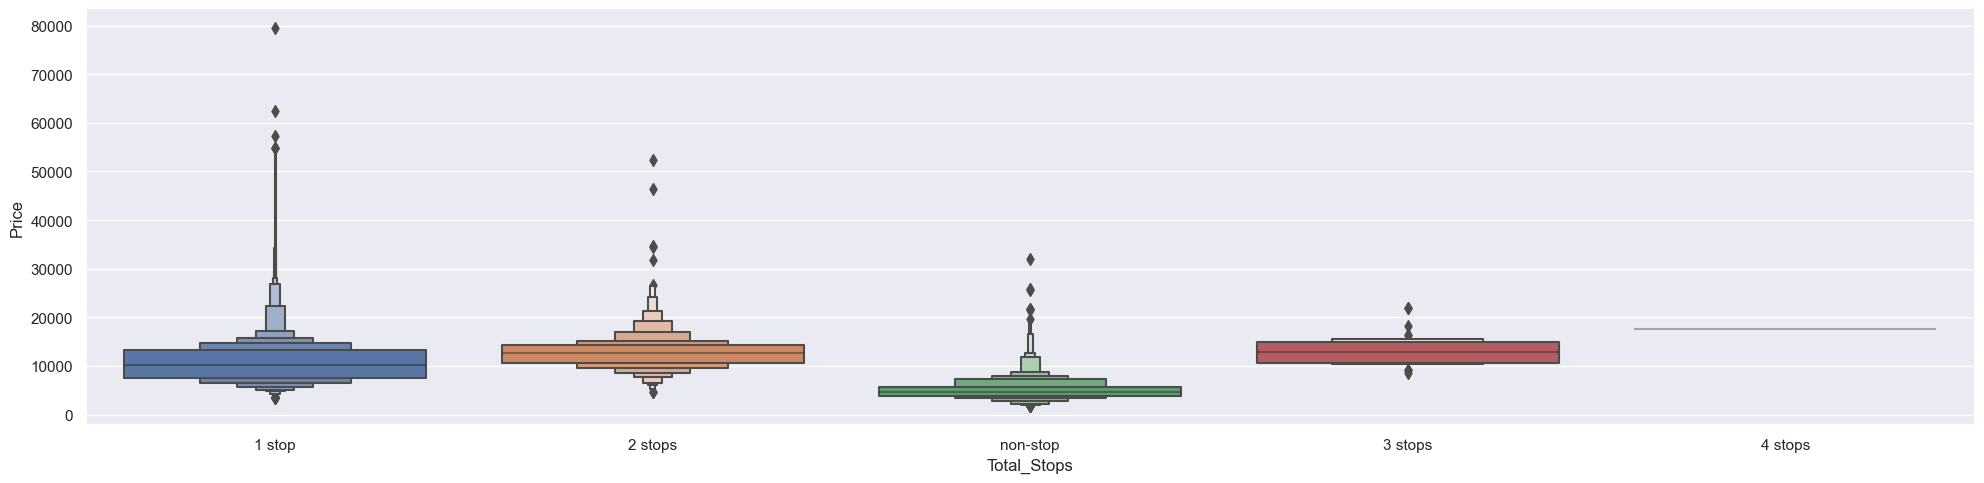

In [40]:
# how price impacting by total stop

sns.catplot(y='Price',
            x='Total_Stops',
            data=dataset.sort_values('Price',ascending=False),
            kind='boxen',
            height=5,
            aspect=4)
plt.show()

In [41]:
# Total_Stops is in order will apply lebel encoding

dataset.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [42]:
dataset['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [43]:
dataset.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,4,45


In [44]:
((dataset['Additional_Info'].value_counts(normalize=True))*100).round(2)

Additional_Info
No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: proportion, dtype: float64

In [45]:
# 78% belongs to no information. Then, what’s the purpose of taking Additional_Info? So, I will drop it.

dataset.drop(['Additional_Info'],axis=1,inplace=True)

In [46]:
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [47]:
# already I have done 1-hot encoding for Airline	Source	Destination so will append here :

final_dataset=pd.concat([dataset,Airline1,Source1,Destination1],axis=1)
final_dataset

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_Time_hour,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,0,1,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,...,0,0,0,0,1,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,...,0,0,0,0,1,0,0,0,0,0
10680,Jet Airways,Banglore,New Delhi,0,7229,27,4,8,20,11,...,0,0,0,0,0,0,0,0,0,1
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,...,1,0,0,0,0,0,0,0,0,1


In [48]:
# drop the original Airline	Source	Destination col:
final_dataset.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [49]:
pd.set_option("display.max_columns", None)
final_dataset.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
# splitting the data into x & y:

x=final_dataset.drop(['Price'],axis=1)
y=final_dataset['Price']

In [51]:
x.shape

(10682, 28)

In [52]:
y.shape

(10682,)

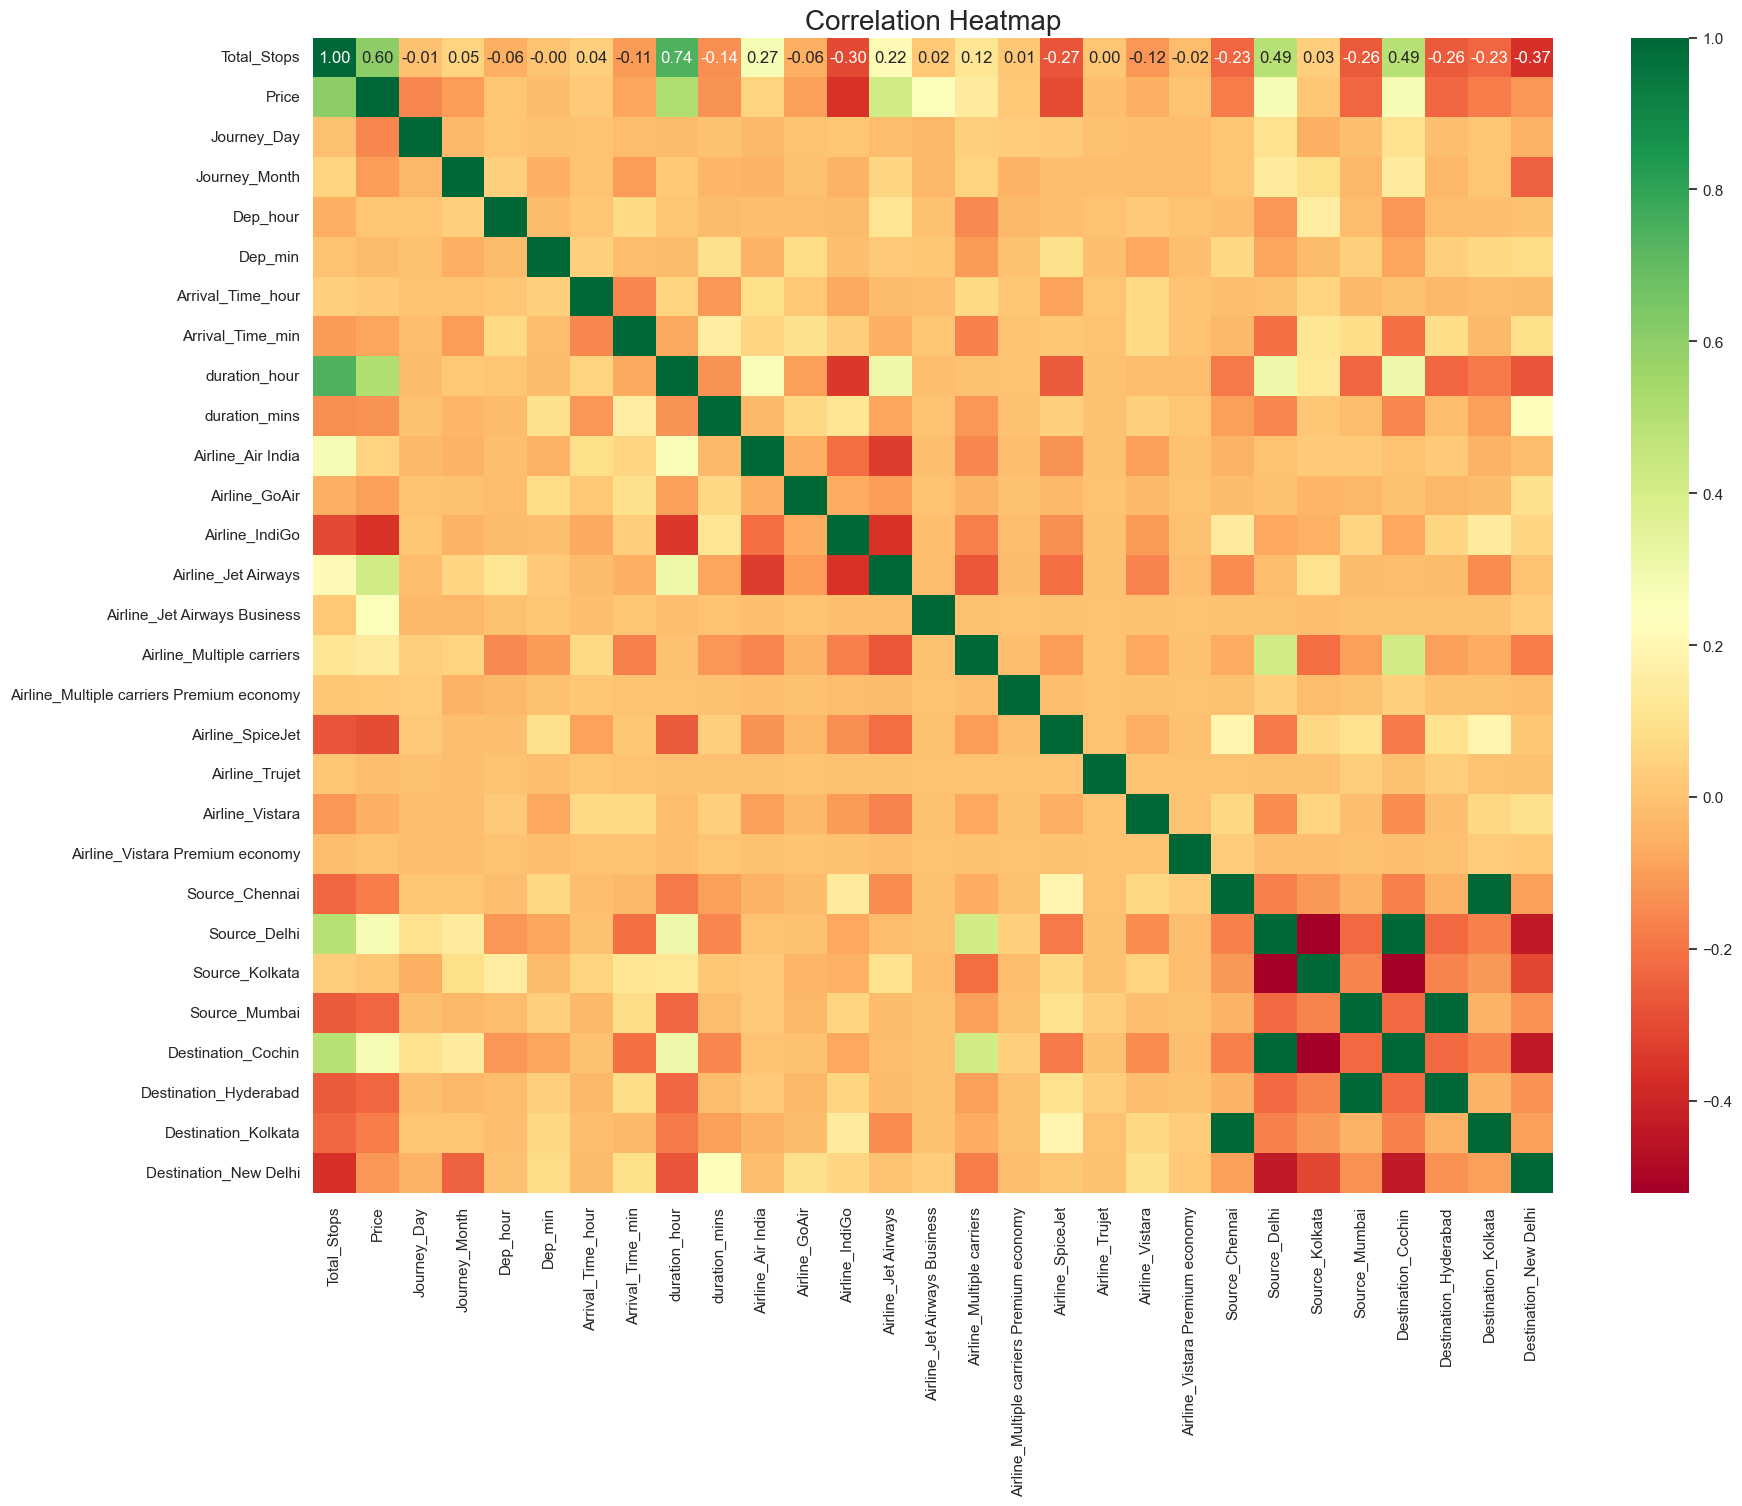

In [53]:
# Check corr():

plt.figure(figsize=(20,15))
sns.heatmap(final_dataset.corr(), annot=True, cmap='RdYlGn',fmt='.2f')
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

# Feature Importance 

In [54]:
# checking which variable is more significant to impact price:

from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(x,y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [55]:
selection.feature_importances_

array([2.51756238e-01, 1.41786531e-01, 5.83293333e-02, 2.40627446e-02,
       2.13244586e-02, 2.74358101e-02, 1.95400468e-02, 1.13856887e-01,
       1.87629152e-02, 1.06903069e-02, 1.98502695e-03, 1.82799614e-02,
       1.32871486e-01, 6.72561007e-02, 1.83046077e-02, 8.58189383e-04,
       5.44650100e-03, 1.17440411e-04, 4.71891514e-03, 5.89912494e-05,
       7.46821135e-04, 9.06886822e-03, 4.80355804e-03, 7.41400714e-03,
       1.26140277e-02, 8.99891459e-03, 6.84596437e-04, 1.82267150e-02])

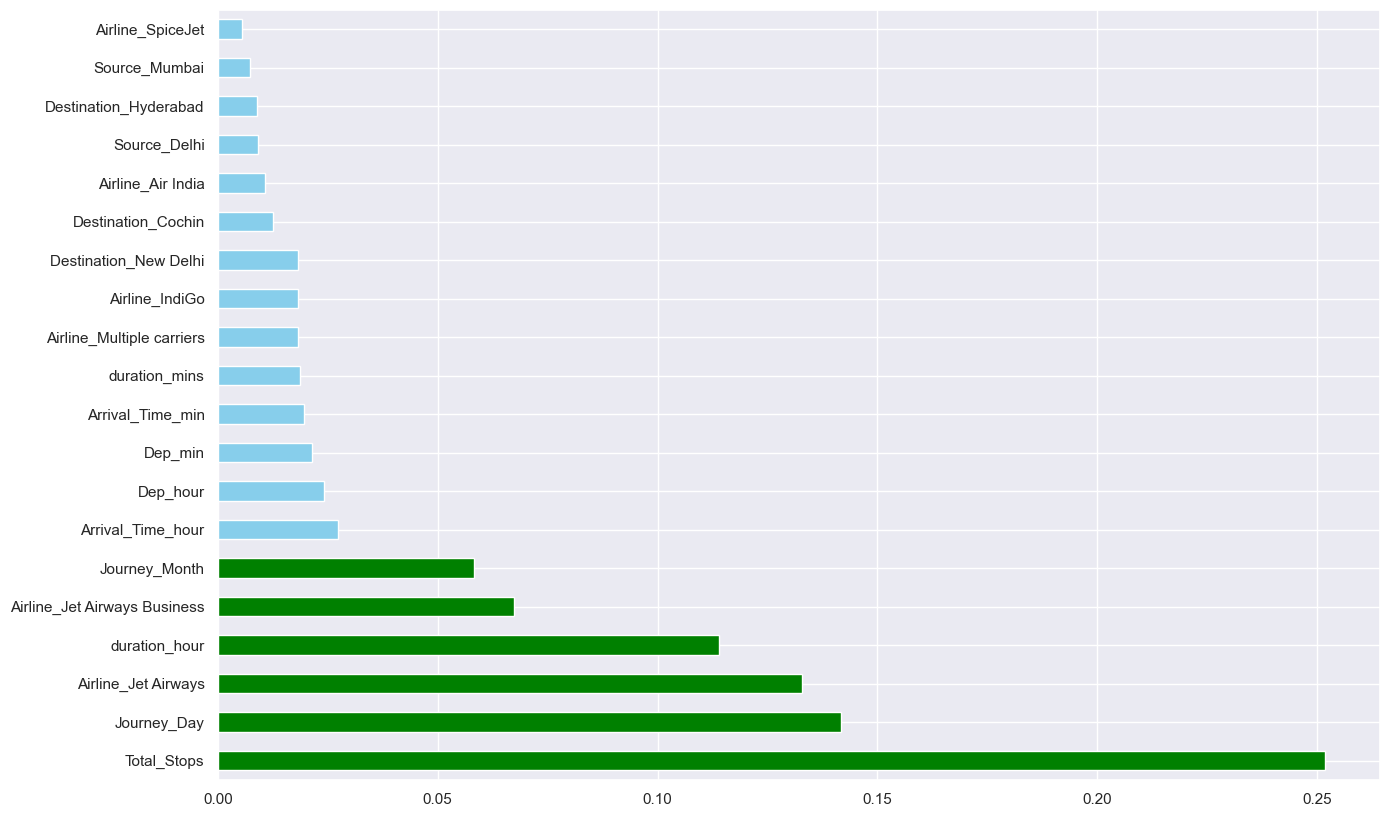

In [56]:
plt.figure(figsize=(15,10))

feat_impor = pd.Series(selection.feature_importances_, index=x.columns)
top_feats = feat_impor.nlargest(20)

threshold = top_feats.mean()
colors = ['green' if val > threshold else 'skyblue' for val in top_feats]

top_feats.plot(kind='barh', color=colors)
plt.show()

##### These are impacting more on price increases & these are  most valuable features for predicting  price:
- Airline_Jet Airways Business
- Airline_Jet Airways
- duration_hour
- Journey_Day
- Total_Stops

# Building Model

#### Random Forest

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
y_pred_train=rf_reg.predict(x_train)
y_pred_test=rf_reg.predict(x_test)

In [60]:
rf_reg.score(x_train,y_train)

0.9532433086441038

In [61]:
rf_reg.score(x_test,y_test)

0.791991327236776

In [62]:
from sklearn import metrics

In [63]:
print(f"MAE :{metrics.mean_absolute_error(y_test,y_pred_test)}")
print(f"MSE :{metrics.mean_squared_error(y_test,y_pred_test)}")
print(f"RMSE :{np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))}")

MAE :1182.4868708432678
MSE :4485094.718034772
RMSE :2117.804220893606


In [64]:
# overall accu

metrics.r2_score(y_test,y_pred_test) 

0.791991327236776

# HyperParameter Tunning:

In [65]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [66]:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'absolute_error'] 
}

rf_tuned = RandomForestRegressor(random_state=42)

CV_rf = RandomizedSearchCV(
    estimator=rf_tuned,
    param_distributions=param_distributions, 
    n_iter=20,           
    cv=5,                
    scoring='r2',        
    verbose=2,           
    n_jobs=-1,           
    random_state=42
)

CV_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': [5, 10, ...], 'max_features': ['auto', 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,20
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [67]:
print("Best Parameters:", CV_rf.best_params_)
print("Best R² Score:", CV_rf.best_score_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'squared_error'}
Best R² Score: 0.7981584796710746


# Re Train the model using Hyper Tunning :

In [68]:
rf_reg_tunned = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    criterion='squared_error',
    random_state=42
)

rf_reg_tunned.fit(x_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [69]:
y_pred_tunned_train=rf_reg_tunned.predict(x_train)
y_pred_tunned_test=rf_reg_tunned.predict(x_test)

In [70]:
print("train R2:", rf_reg_tunned.score(x_train, y_train))
print("test R2:", rf_reg_tunned.score(x_test, y_test))

train R2: 0.8829220607421056
test R2: 0.8250979889731149


In [71]:
print(f"MAE :{metrics.mean_absolute_error(y_test,y_pred_tunned_test)}")
print(f"MSE :{metrics.mean_squared_error(y_test,y_pred_tunned_test)}")
print(f"RMSE :{np.sqrt(metrics.mean_squared_error(y_test,y_pred_tunned_test))}")

MAE :1258.327546045825
MSE :3771247.012970862
RMSE :1941.969879522044


In [72]:
# overall accu

metrics.r2_score(y_test,y_pred_tunned_test) 

0.8250979889731149

# Saving the model:

In [75]:
import pickle

[CV] END criterion=absolute_error, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 2.0min
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 2.2min
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.5min
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.0min


In [77]:
with open('Airline_price_pred_model.pkl', 'wb') as f:
    pickle.dump(rf_reg_tunned, f)